In [66]:
import json

In [76]:


experiments_path = "../"

def fc_to_string(k,cfg):
    res = f"k_{k}bits_"
    for layer in cfg:
        res += str(layer["bits"]) + "."
    
    res +=  "logsize_"
    for layer in cfg:
        res = res + str(layer["logsize"]) + "."
    
    return res


def bits_str(cfg):
    res = "b."
    for layer in cfg:
        res += str(layer["bits"]) + "."
    
    return res

def logsize_str(cfg):
    res = "sz."
    for layer in cfg:
        res = res + str(layer["logsize"]) + "."
    
    return res
  
def load_configs(name):
    with open(f'{experiments_path}config_{name}', 'r') as myfile:
        data=myfile.read()
        obj = json.loads(data)
        return obj["config"]  

def load_exp(fn):
    try:
        with open(fn, 'r') as myfile:
            data=myfile.read()
            # print(data)
            obj = json.loads(data)
            return obj
    except Exception as err:
        print(err)
        return None

    
polygon_sets = [("US Zip Codes", "tl_2017_us_zcta510"), ("Global Adm. Boundaries", "Global_LSIB_Polygons_Detailed")]
datasets =[("Twitter 1 mio","twitter_1mio_coords.h5"), 
           ("Twitter 10 mio","twitter_10mio_coords.h5"),
           ("Twitter 100 mio","twitter_100mio_coords.h5"),
      
          ]

In [77]:
k = 8;
x = 0;
width = 2 * 8192
height = 2 * 8192;
exp_name = "test_polygons_mask1";

cfgs = load_configs(exp_name)
print(len(cfgs))


36


3 6 30
{'b.8.16.': 0, 'b.8.32.': 1, 'b.16.32.': 2}
{'sz.16.20.': 0, 'sz.16.24.': 1, 'sz.20.16.': 2, 'sz.20.24.': 3, 'sz.24.16.': 4, 'sz.24.20.': 5}
{'k_8bits_8.logsize_16.': 6, 'k_8bits_8.16.logsize_16.20.': 1, 'k_8bits_8.16.32.logsize_16.20.24.': 2, 'k_8bits_8.32.logsize_16.20.': 3, 'k_8bits_16.logsize_16.': 10, 'k_8bits_16.32.logsize_16.20.': 5, 'k_8bits_8.16.logsize_16.24.': 7, 'k_8bits_8.16.32.logsize_16.24.20.': 8, 'k_8bits_8.32.logsize_16.24.': 9, 'k_8bits_16.32.logsize_16.24.': 11, 'k_8bits_8.logsize_20.': 18, 'k_8bits_8.16.logsize_20.16.': 13, 'k_8bits_8.16.32.logsize_20.16.24.': 14, 'k_8bits_8.32.logsize_20.16.': 15, 'k_8bits_16.logsize_20.': 22, 'k_8bits_16.32.logsize_20.16.': 17, 'k_8bits_8.16.logsize_20.24.': 19, 'k_8bits_8.16.32.logsize_20.24.16.': 20, 'k_8bits_8.32.logsize_20.24.': 21, 'k_8bits_16.32.logsize_20.24.': 23, 'k_8bits_8.logsize_24.': 30, 'k_8bits_8.16.logsize_24.16.': 25, 'k_8bits_8.16.32.logsize_24.16.20.': 26, 'k_8bits_8.32.logsize_24.16.': 27, 'k_8bits_16.l

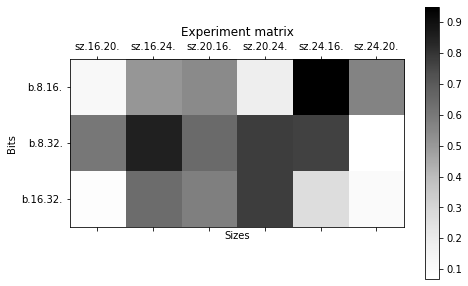

In [78]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.backends.backend_pdf as pdf
import tqdm

def save_figs(fn):
    print(f"-->  Saving all figures... {fn}")
    out_pdf = pdf.PdfPages(fn)
    for fig in tqdm.tqdm(range(1, plt.gcf().number+1)):
        out_pdf.savefig( fig )
    out_pdf.close()
    plt.close("all")


def plot_matrix(cm, title='Experiment matrix', cmap='Greys', xlabels=None, ylabels=None, cblabel=None):
    fig = plt.figure(figsize=(len(xlabels)*1.25, 2+ len(ylabels)))
    ax = fig.add_subplot(111)
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    # ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    cax = ax.matshow(cm,cmap=cmap)
    plt.title(title)
    ax.set_xticks(range(len(xlabels)))
    ax.set_yticks(range(len(ylabels)))
    cbar = fig.colorbar(cax)

    if cblabel:
        cbar.set_label(cblabel)
    if xlabels:
        ax.set_xticklabels(list(xlabels))
    if ylabels:
        ax.set_yticklabels(list(ylabels))
    plt.xlabel('Sizes')
    plt.ylabel('Bits')
    #plt.show()


def make_maps(size, cfgs):
    bits_map = {}
    logsize_map = {}
    numba = {}
    count_bits =0
    count_sizes = 0
    counter = 0
    for c in cfgs :

        if len(c) ==size:
            if(not bits_str(c) in bits_map):
                bits_map[bits_str(c)] = count_bits
                count_bits+=1
            if(not logsize_str(c) in logsize_map):
                logsize_map[logsize_str(c)] = count_sizes
                count_sizes+=1
        numba[fc_to_string(k,c)] = counter
        counter += 1
                
    return bits_map, logsize_map, numba
def make_maps_any( cfgs):
    bits_map = {}
    logsize_map = {}
    numba = {}
    count_bits =0
    count_sizes = 0
    counter = 0
    for c in cfgs :
        if(not bits_str(c) in bits_map):
            bits_map[bits_str(c)] = count_bits
            count_bits+=1
        if(not logsize_str(c) in logsize_map):
            logsize_map[logsize_str(c)] = count_sizes
            count_sizes+=1
    numba[fc_to_string(k,c)] = counter
    counter += 1
                
    return bits_map, logsize_map, numba

bits_map, logsize_map, numba = make_maps(2,cfgs)

print(len(bits_map), len(logsize_map), len(numba))
print(bits_map)
print(logsize_map)
print(numba)
a = np.random.rand(len(bits_map), len(logsize_map))
plot_matrix(a, ylabels=bits_map.keys(), xlabels=logsize_map.keys())


In [79]:


def make_matrices(size, cfgs):
    bits_map, logsize_map, numba = make_maps(size,cfgs)
    matrices= {}
    matrix_indices = ["errors_hash_pc"]
    name= {"errors_mask_pc": "masked",
           "errors_hash_pc": "hash"}
    mi2 = ["min","max","mean","std"]
    for shapen,shapef in polygon_sets:
        matrices[shapef] = {}
        for dn, ds in datasets :
            matrices[shapef][ds] = {}
            for mi in matrix_indices:
                matrices[shapef][ds][mi] = {}                
                for m2 in mi2:
                    matrices[shapef][ds][mi][m2] = np.zeros((len(bits_map),(len(logsize_map))))-1



    x=0
    for c in cfgs :
        # print(fc_to_string(k,c))
        y = 0;
        for shpn, shapef in polygon_sets:
            for  dn, ds in datasets :
                idd = fc_to_string(k,c)
                fn = experiments_path + exp_name + "/" + exp_name + f'.w{width}h{height}.' + idd \
                + ds + f".{shapef}-{width}x{height}" + ".json"
                data = load_exp(fn)
                bits = bits_str(c)
                sz = logsize_str(c)
                if data and bits in bits_map and  sz in logsize_map:
                    for mi in matrix_indices:
                        for m2 in mi2:
                            matrices[shapef][ds][mi][m2][ bits_map[bits], logsize_map[sz]] = data[mi][m2]*100
            y+=1
        x+=1

    for  dn, ds in datasets :
        for shpn, shapef in polygon_sets:
            for mi in matrix_indices:   
                for m2 in mi2:
                    plot_matrix( matrices[shapef][ds][mi][m2] ,title=f'{dn} {shpn} {m2}',ylabels=bits_map.keys(), xlabels=logsize_map.keys(), cblabel=f"% Error")             

#make_matrices(1, cfgs)   
make_matrices(2, cfgs)              
#make_matrices(3, cfgs)              


save_figs("polygons_mask_matrices.pdf")

Expecting value: line 1 column 1 (char 0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


-->  Saving all figures... polygons_mask_matrices.pdf


100%|██████████| 24/24 [00:00<00:00, 27.73it/s]


In [83]:
figsize=(4,4)
def make_plots( cfgs):
    bits_map, logsize_map, numba = make_maps_any(cfgs)
    matrices= {}
    matrix_indices = ["errors_hash_pc",
                     # "errors_mask_pc"
                     ]
    name= {"errors_mask_pc": "masked",
           "errors_hash_pc": "hash"}
    mi2 = ["min","max","mean","std"]
    for shapen,shapef in polygon_sets:
        matrices[shapef] = {}
        for dn, ds in datasets :
            matrices[shapef][ds] = {}
            for mi in matrix_indices:
                matrices[shapef][ds][mi] = {}                
                for m2 in mi2:
                    matrices[shapef][ds][mi][m2] = []



    x=0
    for c in cfgs :
        # print(fc_to_string(k,c))
        y = 0;
        for shpn, shapef in polygon_sets:
            for  dn, ds in datasets :
                idd = fc_to_string(k,c)
                fn = experiments_path + exp_name + "/" + exp_name + f'.w{width}h{height}.' + idd \
                + ds + f".{shapef}-{width}x{height}" + ".json"
                data = load_exp(fn)
                bits = bits_str(c)
                sz = logsize_str(c)
                if data and bits in bits_map and  sz in logsize_map and c[-1]["bits"] >16:
                    for mi in matrix_indices:
                        for m2 in mi2:
                            matrices[shapef][ds][mi][m2].append(data[mi][m2]*100)
            y+=1
        x+=1

                    
    for shpn, shapef in polygon_sets:                    
        for mi in matrix_indices: 
            ds_min = {}
            ds_max = {}
            ds_mean = {}
            ds_std = {}
            for dn, ds in datasets : 
                ar = matrices[shapef][ds][mi]
                #print(ar)
                ds_min[dn] = np.min(ar["min"])
                ds_max[dn] = np.max(ar["max"])
                ds_mean[dn] = np.mean(ar["mean"])
                ds_std[dn] = np.mean(ar["std"])

            fig = plt.figure(figsize=figsize)
            ax = fig.add_subplot(111)

            #plt.bar(list(ds_max.keys()), list(ds_max.values()), label=f'{k} max', color="red")
            #plt.bar(list(ds_mean.keys()), list(ds_mean.values()), label=f'{k} mean', color="blue")
            #plt.bar(list(ds_min.keys()), list(ds_min.values()), label=f'{k} min', color="green")
            means = np.array(list(ds_mean.values()))
            maxes = np.array(list(ds_max.values()))
            mins = np.array(list(ds_min.values()))
            std = np.array(list(ds_std.values()))



            # create stacked errorbars:
            plt.errorbar(ds_max.keys(), means, std, fmt='ok', lw=3,capsize=3, label="mean +- std")
            plt.errorbar(ds_max.keys(), means, [means - mins, maxes - means],
                         fmt='.k', ecolor='gray', capsize=6, lw=1, label="[min max]")

            plt.legend(loc='upper left')
            plt.title(f"{shpn}")
            plt.xlabel('Dataset')
            plt.ylabel('Error %')  
            plt.xticks(rotation=30, ha='right')
            plt.gca().set_ylim(bottom=0)
            plt.subplots_adjust(left=0.2, bottom=0.3)
            #########################################################
            
            fig = plt.figure(figsize=figsize)
            ax = fig.add_subplot(111)

            #plt.bar(list(ds_max.keys()), list(ds_max.values()), label=f'{k} max', color="red")
            #plt.bar(list(ds_mean.keys()), list(ds_mean.values()), label=f'{k} mean', color="blue")
            #plt.bar(list(ds_min.keys()), list(ds_min.values()), label=f'{k} min', color="green")
            means = np.array(list(ds_mean.values()))
            maxes = np.array(list(ds_max.values()))
            mins = np.array(list(ds_min.values()))
            std = np.array(list(ds_std.values()))



            # create stacked errorbars:
            plt.errorbar(ds_max.keys(), means, std, fmt='ok', lw=3,capsize=3, label="mean +- std")
            #plt.errorbar(ds_max.keys(), means, [means - mins, maxes - means],
            #             fmt='.k', ecolor='gray', capsize=6, lw=1, label="[min max]")

            plt.legend(loc='upper left')
            plt.title(f"{shpn}")
            plt.xlabel('Dataset')
            plt.ylabel('Error %')  
            plt.xticks(rotation=30, ha='right')
            
            plt.gca().set_ylim(bottom=0)

            plt.subplots_adjust(left=0.2, bottom=0.3)
            #########################################################
            
            fig = plt.figure(figsize=figsize)
            ax = fig.add_subplot(111)

            #plt.bar(list(ds_max.keys()), list(ds_max.values()), label=f'{k} max', color="red")
            #plt.bar(list(ds_mean.keys()), list(ds_mean.values()), label=f'{k} mean', color="blue")
            #plt.bar(list(ds_min.keys()), list(ds_min.values()), label=f'{k} min', color="green")
            means = np.array(list(ds_mean.values()))
            maxes = np.array(list(ds_max.values()))
            mins = np.array(list(ds_min.values()))
            std = np.array(list(ds_std.values()))



            # create stacked errorbars:
            plt.errorbar(ds_max.keys(), means, std, fmt='ok', lw=3,capsize=3, label="mean +- std")
            #plt.errorbar(ds_max.keys(), means, [means - mins, maxes - means],
            #             fmt='.k', ecolor='gray', capsize=6, lw=1, label="[min max]")

            plt.legend(loc='upper left')
            plt.title(f"{shpn}")
            plt.xlabel('Dataset')
            plt.ylabel('Error %')  
            plt.xticks(rotation=30, ha='right')
            
            plt.ylim([0,100])

            plt.subplots_adjust(left=0.2, bottom=0.3)


make_plots(cfgs)
#plt.show()
save_figs("polygons_mask_plot.pdf")

Expecting value: line 1 column 1 (char 0)
-->  Saving all figures... polygons_mask_plot.pdf


100%|██████████| 6/6 [00:00<00:00, 38.07it/s]


In [86]:
figsize=(4,4)
ds_size ={
           "Twitter 1 mio": 1_000_000,
           "Twitter 10 mio":10_000_000,
           "Twitter 100 mio":100_000_000,
           "Twitter 50 mio":50_000_000,
           "Twitter 200 mio":200_000_000,
           "OSM 500 mio":500_000_000,      
           "OSM 1 bil":1_000_000_000,
          
    }
def make_plots_ff( cfgs):
    bits_map, logsize_map, numba = make_maps_any(cfgs)
    matrices= {}
    matrix_indices = ["errors_hash_pc",
                     # "errors_mask_pc"
                     ]
    name= {"errors_mask_pc": "masked",
           "errors_hash_pc": "hash"}
    mi2 = ["min","max","mean","std"]
    for shapen,shapef in polygon_sets:
        matrices[shapef] = {}
        for dn, ds in datasets :
            matrices[shapef][ds] = {}
            for mi in matrix_indices:
                matrices[shapef][ds][mi] = {"global":{}}                
                for m2 in mi2:
                    matrices[shapef][ds][mi][m2] = []



    x=0
    for c in cfgs :
        # print(fc_to_string(k,c))
        y = 0;
        for shpn, shapef in polygon_sets:
            for  dn, ds in datasets :
                idd = fc_to_string(k,c)
                fn = experiments_path + exp_name + "/" + exp_name + f'.w{width}h{height}.' + idd \
                + ds + f".{shapef}-{width}x{height}" + ".json"
                data = load_exp(fn)
                bits = bits_str(c)
                sz = logsize_str(c)
                ff = c[-1]["bits"]
                #print(ff)
                if data and bits in bits_map and  sz in logsize_map and c[-1]["bits"] >=8:
                    for mi in matrix_indices:
                        if not ff in matrices[shapef][ds][mi]["global"]:
                            matrices[shapef][ds][mi]["global"][ff] ={}
                        for m2 in mi2:
                            if not m2 in matrices[shapef][ds][mi]["global"][ff]:
                                matrices[shapef][ds][mi]["global"][ff][m2] =[]
                            matrices[shapef][ds][mi]["global"][ff][m2].append(data[mi][m2]*100)
            y+=1
        x+=1

    #print(matrices)            
    for shpn, shapef in polygon_sets:                    
        for mi in matrix_indices: 
            ds_min = {}
            ds_max = {}
            ds_mean = {}
            ds_std = {}
            for dn, ds in datasets :
                for idx in matrices[shapef][ds][mi]["global"].keys():
                    comp = float(idx) /  (ds_size[dn]*8)

                    cr = f'{comp}'
                    ar = matrices[shapef][ds][mi]["global"][idx]
                    #print(ar)
                    ds_min[idx] = np.min(ar["min"])
                    ds_max[idx] = np.max(ar["max"])
                    ds_mean[idx] = np.mean(ar["mean"])
                    ds_std[idx] = np.mean(ar["std"])

                fig = plt.figure(figsize=figsize)
                ax = fig.add_subplot(111)

                #plt.bar(list(ds_max.keys()), list(ds_max.values()), label=f'{k} max', color="red")
                #plt.bar(list(ds_mean.keys()), list(ds_mean.values()), label=f'{k} mean', color="blue")
                #plt.bar(list(ds_min.keys()), list(ds_min.values()), label=f'{k} min', color="green")
                means = np.array(list(ds_mean.values()))
                maxes = np.array(list(ds_max.values()))
                mins = np.array(list(ds_min.values()))
                std = np.array(list(ds_std.values()))



                # create stacked errorbars:
                plt.errorbar(ds_max.keys(), means, std, fmt='ok', lw=3,capsize=3, label="mean +- std")
                #plt.errorbar(ds_max.keys(), means, [means - mins, maxes - means],
                #             fmt='.k', ecolor='gray', capsize=6, lw=1, label="[min max]")

                plt.legend(loc='upper left')
                plt.title(f"{shpn} - {dn}")
                plt.xlabel('Last filter bit depth')
                plt.ylabel('Error %')  
                plt.xticks(rotation=30, ha='right')
                plt.gca().set_ylim(bottom=0)
                
                plt.subplots_adjust(left=0.2, bottom=0.3)



make_plots_ff(cfgs)
#plt.show()
save_figs("polygons_mask_ff.pdf")

Expecting value: line 1 column 1 (char 0)
-->  Saving all figures... polygons_mask_ff.pdf


100%|██████████| 6/6 [00:00<00:00, 35.64it/s]


In [104]:
figsize=(4,4)
ds_size ={
           "Twitter 1 mio": 1_000_000,
           "Twitter 10 mio":10_000_000,
           "Twitter 100 mio":100_000_000,
           "Twitter 50 mio":50_000_000,
           "Twitter 200 mio":200_000_000,
           "OSM 500 mio":500_000_000,      
           "OSM 1 bil":1_000_000_000,
          
    }
def make_plots_comp( cfgs):
    bits_map, logsize_map, numba = make_maps_any(cfgs)
    matrices= {}
    matrix_indices = ["errors_hash_pc",
                     # "errors_mask_pc"
                     ]
    name= {"errors_mask_pc": "masked",
           "errors_hash_pc": "hash"}
    mi2 = ["min","max","mean","std"]
    for shapen,shapef in polygon_sets:
        matrices[shapef] = {}
        for dn, ds in datasets :
            matrices[shapef][ds] = {}
            for mi in matrix_indices:
                matrices[shapef][ds][mi] = {"global":{}}                
                for m2 in mi2:
                    matrices[shapef][ds][mi][m2] = []



    x=0
    for c in cfgs :
        # print(fc_to_string(k,c))
        y = 0;
        for shpn, shapef in polygon_sets:
            for  dn, ds in datasets :
                idd = fc_to_string(k,c)
                fn = experiments_path + exp_name + "/" + exp_name + f'.w{width}h{height}.' + idd \
                + ds + f".{shapef}-{width}x{height}" + ".json"
                data = load_exp(fn)
                bits = bits_str(c)
                sz = logsize_str(c)
                #print(fn)
                #print(data["summary"]["byte_size"])
                ff = f'{int(data["summary"]["byte_size"])}'
                #print(ff)
                if data and bits in bits_map and  sz in logsize_map and c[-1]["bits"] >=8:
                    for mi in matrix_indices:
                        if not ff in matrices[shapef][ds][mi]["global"]:
                            matrices[shapef][ds][mi]["global"][ff] ={}
                        for m2 in mi2:
                            if not m2 in matrices[shapef][ds][mi]["global"][ff]:
                                matrices[shapef][ds][mi]["global"][ff][m2] =[]
                            matrices[shapef][ds][mi]["global"][ff][m2].append(data[mi][m2]*100)
                        matrices[shapef][ds][mi]["global"][ff]["mb_size"]= f'{data["summary"]["mb_size"]}mb ({bits}{sz})'
            y+=1
        x+=1

    #print(matrices)            
    for shpn, shapef in polygon_sets:                    
        for mi in matrix_indices: 
            ds_min = {}
            ds_max = {}
            ds_mean = {}
            ds_std = {}
            for dn, ds in datasets :
                for idx in matrices[shapef][ds][mi]["global"].keys():
                    comp = float(idx) /  (ds_size[dn]*8)
                    if comp < 1.0:
                        cr = f'{comp}'
                        ar = matrices[shapef][ds][mi]["global"][idx]
                        #print(ar)
                        ds_min[cr] = np.min(ar["min"])
                        ds_max[cr] = np.max(ar["max"])
                        ds_mean[cr] = np.mean(ar["mean"])
                        ds_std[cr] = np.mean(ar["std"])

                fig = plt.figure(figsize=figsize)
                ax = fig.add_subplot(111)

                #plt.bar(list(ds_max.keys()), list(ds_max.values()), label=f'{k} max', color="red")
                #plt.bar(list(ds_mean.keys()), list(ds_mean.values()), label=f'{k} mean', color="blue")
                #plt.bar(list(ds_min.keys()), list(ds_min.values()), label=f'{k} min', color="green")
                means = np.array(list(ds_mean.values()))
                maxes = np.array(list(ds_max.values()))
                mins = np.array(list(ds_min.values()))
                std = np.array(list(ds_std.values()))


                x = np.array(list(map(float, ds_max.keys())))*100
                # create stacked errorbars:
                plt.errorbar(x, means, std, fmt='ok', lw=3,capsize=3, label="mean +- std")
                plt.errorbar(x, means, [means - mins, maxes - means],
                             fmt='.k', ecolor='gray', capsize=6, lw=1, label="[min max]")

                plt.legend(loc='upper left')
                plt.title(f"{shpn} - {dn}")
                plt.xlabel('Compression')
                plt.ylabel('Error %')  
                plt.xticks(rotation=30, ha='right')
                plt.gca().set_ylim(bottom=0)
                plt.subplots_adjust(left=0.2, bottom=0.3)
                #############################################
                fig = plt.figure(figsize=figsize)
                ax = fig.add_subplot(111)

                #plt.bar(list(ds_max.keys()), list(ds_max.values()), label=f'{k} max', color="red")
                #plt.bar(list(ds_mean.keys()), list(ds_mean.values()), label=f'{k} mean', color="blue")
                #plt.bar(list(ds_min.keys()), list(ds_min.values()), label=f'{k} min', color="green")
                means = np.array(list(ds_mean.values()))
                maxes = np.array(list(ds_max.values()))
                mins = np.array(list(ds_min.values()))
                std = np.array(list(ds_std.values()))


                x = np.array(list(map(float, ds_max.keys())))*100
                # create stacked errorbars:
                plt.bar(x,means, label="mean")
                #plt.errorbar(x, means, std, fmt='ok', lw=3,capsize=3, label="mean +- std")
                #plt.errorbar(x, means, [means - mins, maxes - means],
                             #fmt='.k', ecolor='gray', capsize=6, lw=1, label="[min max]")

                plt.legend(loc='upper left')
                plt.title(f"{shpn} - {dn}")
                plt.xlabel('Compression %')
                plt.ylabel('Error %')  
                plt.xticks(rotation=30, ha='right')
                plt.ylim([0,100])
                plt.subplots_adjust(left=0.2, bottom=0.3)



make_plots_comp(cfgs)

save_figs("polygons_mask_comp.pdf")

-->  Saving all figures... polygons_mask_comp.pdf


100%|██████████| 12/12 [00:00<00:00, 27.12it/s]


In [73]:
from scipy import signal
from PIL import Image
def make_hist(size, cfgs):
    bits_map, logsize_map, numba = make_maps(size,cfgs)
    matrices= {}
    matrix_indices = ["histogram_pc"]
    for shapen,shapef in polygon_sets:
        matrices[shapef] = {}
        for dn, ds in datasets :
            matrices[shapef][ds] = {}
            for mi in matrix_indices:
                matrices[shapef][ds][mi] = np.zeros((len(bits_map),(len(logsize_map))))-1



    x=0
    for c in cfgs :
        # print(fc_to_string(k,c))
        y = 0;
        for shpn, shapef in polygon_sets:
            for  dn, ds in datasets :
                fn = experiments_path + exp_name + "/" + exp_name + f'.w{width}h{height}.{x:04d}.{y}-' + fc_to_string(k,c) \
                + ds + "." + shapef + ".json"
                # print(fn)
                data = load_exp(fn)
                bits = bits_str(c)
                sz = logsize_str(c)
                if data and bits in bits_map and  sz in logsize_map:
                    for mi in matrix_indices:
                        p =  np.abs(data[mi]) #scipy.signal.resample(data[mi], 100)
                        ##p = np.array(Image.fromarray(data[mi]).resize(100,1))
                        #print(p)
                        plt.figure(figsize=figsize)
                        plt.bar(list(np.arange(0,100,100/len(p))),p)
                        plt.title(f'{dn} - {shpn} b{bits} sz{sz}')
                        #plt.show()

            y+=1
        x+=1

   # for shpn, shapef in polygon_sets:
   #     for  dn, ds in datasets :
   #         for mi in matrix_indices:   
   #             print(matrices[shapef][ds][mi])
make_hist(1,cfgs)
save_figs("polygons_mask_hist1.pdf")
make_hist(2,cfgs)
save_figs("polygons_mask_hist2.pdf")
make_hist(3,cfgs)
save_figs("polygons_mask_hist3.pdf")

[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0000.0-k_8bits_8.logsize_16.twitter_1mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0000.0-k_8bits_8.logsize_16.twitter_10mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0000.1-k_8bits_8.logsize_16.twitter_1mio_coords.h5.Global_LSIB_Polygons_Detailed.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0000.1-k_8bits_8.logsize_16.twitter_10mio_coords.h5.Global_LSIB_Polygons_Detailed.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0001.0-k_8bits_8.16.logsize_16.20.twitter_1mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0001.0-k_8bits_8.16.logsiz

100%|██████████| 1/1 [00:00<00:00, 1288.18it/s]


[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0000.0-k_8bits_8.logsize_16.twitter_1mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0000.0-k_8bits_8.logsize_16.twitter_10mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0000.1-k_8bits_8.logsize_16.twitter_1mio_coords.h5.Global_LSIB_Polygons_Detailed.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0000.1-k_8bits_8.logsize_16.twitter_10mio_coords.h5.Global_LSIB_Polygons_Detailed.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0001.0-k_8bits_8.16.logsize_16.20.twitter_1mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0001.0-k_8bits_8.16.logsiz

100%|██████████| 1/1 [00:00<00:00, 1365.78it/s]


[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0000.0-k_8bits_8.logsize_16.twitter_1mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0000.0-k_8bits_8.logsize_16.twitter_10mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0000.1-k_8bits_8.logsize_16.twitter_1mio_coords.h5.Global_LSIB_Polygons_Detailed.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0000.1-k_8bits_8.logsize_16.twitter_10mio_coords.h5.Global_LSIB_Polygons_Detailed.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0001.0-k_8bits_8.16.logsize_16.20.twitter_1mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w16384h16384.0001.0-k_8bits_8.16.logsiz

100%|██████████| 1/1 [00:00<00:00, 1398.57it/s]


In [74]:
from scipy import signal
from PIL import Image
k = 8;


cfgs = load_configs(exp_name)
print(len(cfgs))


def make_hist_3d(size, cfgs):
    bits_map, logsize_map, numba = make_maps(size,cfgs)
    
    lb = len(bits_map)
    lls = len(logsize_map)
    
    matrices= {}
    matrix_indices = ["errors_mask_pc","errors_hash_pc"]
    for shapen,shapef in polygon_sets:
        matrices[shapef] = {}
        for dn, ds in datasets :
            matrices[shapef][ds] = {}
            for mi in matrix_indices:
                matrices[shapef][ds][mi] = np.zeros((128,lb*lls))-1
    width = 16 * 8192
    height = 16 * 8192
    xlabels = []
    
    for b in logsize_map.keys():
        for a in bits_map.keys():
            xlabels.append(f'{a} {b}')
    
    
    x=0
    for c in cfgs :
        # print(fc_to_string(k,c))
        y = 0;
        for shpn, shapef in polygon_sets:
            for  dn, ds in datasets :
                fn = experiments_path + exp_name + "/" + exp_name + f'.w{width}h{height}.{x:04d}.{y}-' + fc_to_string(k,c) \
                + ds + "." + shapef + ".json"
                # print(fn)
                data = load_exp(fn)
                bits = bits_str(c)
                sz = logsize_str(c)
                if data and bits in bits_map and  sz in logsize_map:
                    for mi in matrix_indices:
                        p =  np.abs(data[mi])
                        a = bits_map[bits]
                        b = logsize_map[sz]
                        matrices[shapef][ds][mi][:, a+b*lb] = p
                        


            y+=1
        x+=1

    for shpn, shapef in polygon_sets:
        for  dn, ds in datasets :
            for mi in matrix_indices:   
                print(matrices[shapef][ds][mi].shape)
                ms = matrices[shapef][ds][mi].shape
                
                fig = plt.figure(figsize=(12, 12))
                ax1 = fig.add_subplot(111, projection='3d')

                lb = len(bits_map)
                lls = len(logsize_map)
                print(lb)
                print(lls)
                print(lb*lls)
                
                _x = np.arange(0,ms[1])
                _y = np.arange(0,100,100/ms[0])
                X, Y = np.meshgrid(_x, _y)
                x, y = X.ravel(), Y.ravel()
                R = np.sqrt(X**2 + Y**2)
                Z = np.sin(R)

                top = matrices[shapef][ds][mi].ravel()
                bottom = np.zeros_like(top)
                width = depth = 1
       
                print(X.shape)
                print(Y.shape)
                print(x.shape)
                print(y.shape)
                
                
                print(R.shape)
                print(Z.shape)
                print(top.shape)
                
                

                surf = ax1.bar3d(x,y, bottom, width, depth,  top, shade=True,)
                ax1.set_title(f'{dn}-{shpn}')

                ax1.set_xticklabels(list(xlabels))
                ax1.set_xlabel('Configuration')
                ax1.set_ylabel('Percentile')
                ax1.set_zlabel('% Error')
                

                #fig.colorbar(surf, shrink=0.25, aspect=9)
                #plt.show()
                
make_hist_3d(1,cfgs)
save_figs("polygons_mask_hist1_3d.pdf")                
make_hist_3d(2,cfgs)
save_figs("polygons_mask_hist2_3d.pdf")

36
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w131072h131072.0000.0-k_8bits_8.logsize_16.twitter_1mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w131072h131072.0000.0-k_8bits_8.logsize_16.twitter_10mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w131072h131072.0000.1-k_8bits_8.logsize_16.twitter_1mio_coords.h5.Global_LSIB_Polygons_Detailed.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w131072h131072.0000.1-k_8bits_8.logsize_16.twitter_10mio_coords.h5.Global_LSIB_Polygons_Detailed.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w131072h131072.0001.0-k_8bits_8.16.logsize_16.20.twitter_1mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w131072h131072.0001.0-k_8b

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator


(128, 6)
2
3
6
(128, 6)
(128, 6)
(768,)
(768,)
(128, 6)
(128, 6)
(768,)
(128, 6)
2
3
6
(128, 6)
(128, 6)
(768,)
(768,)
(128, 6)
(128, 6)
(768,)
(128, 6)
2
3
6
(128, 6)
(128, 6)
(768,)
(768,)
(128, 6)
(128, 6)
(768,)
(128, 6)
2
3
6
(128, 6)
(128, 6)
(768,)
(768,)
(128, 6)
(128, 6)
(768,)
(128, 6)
2
3
6
(128, 6)
(128, 6)
(768,)
(768,)
(128, 6)
(128, 6)
(768,)
(128, 6)
2
3
6
(128, 6)
(128, 6)
(768,)
(768,)
(128, 6)
(128, 6)
(768,)
(128, 6)
2
3
6
(128, 6)
(128, 6)
(768,)
(768,)
(128, 6)
(128, 6)
(768,)
-->  Saving all figures... polygons_mask_hist1_3d.pdf


100%|██████████| 8/8 [00:03<00:00,  2.05it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator


[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w131072h131072.0000.0-k_8bits_8.logsize_16.twitter_1mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w131072h131072.0000.0-k_8bits_8.logsize_16.twitter_10mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w131072h131072.0000.1-k_8bits_8.logsize_16.twitter_1mio_coords.h5.Global_LSIB_Polygons_Detailed.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w131072h131072.0000.1-k_8bits_8.logsize_16.twitter_10mio_coords.h5.Global_LSIB_Polygons_Detailed.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w131072h131072.0001.0-k_8bits_8.16.logsize_16.20.twitter_1mio_coords.h5.tl_2017_us_zcta510.json'
[Errno 2] No such file or directory: '../test_polygons_mask1/test_polygons_mask1.w131072h131072.0001.0-k_8bits

(128, 18)
3
6
18
(128, 18)
(128, 18)
(2304,)
(2304,)
(128, 18)
(128, 18)
(2304,)
(128, 18)
3
6
18
(128, 18)
(128, 18)
(2304,)
(2304,)
(128, 18)
(128, 18)
(2304,)
(128, 18)
3
6
18
(128, 18)
(128, 18)
(2304,)
(2304,)
(128, 18)
(128, 18)
(2304,)
(128, 18)
3
6
18
(128, 18)
(128, 18)
(2304,)
(2304,)
(128, 18)
(128, 18)
(2304,)
(128, 18)
3
6
18
(128, 18)
(128, 18)
(2304,)
(2304,)
(128, 18)
(128, 18)
(2304,)
(128, 18)
3
6
18
(128, 18)
(128, 18)
(2304,)
(2304,)
(128, 18)
(128, 18)
(2304,)
-->  Saving all figures... polygons_mask_hist2_3d.pdf


100%|██████████| 8/8 [00:10<00:00,  1.37s/it]
